In [1]:
from __future__ import print_function
from __future__ import division
import random
import pprint
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torchvision import transforms, utils
from CubeDataset import CubeDataset
import transforms
from transforms_custom import Rescale, ToTensor
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.keypoint_rcnn import KeypointRCNNPredictor
from engine import fit, train_one_epoch
import utils
import vis

plt.ion()

## Dataset

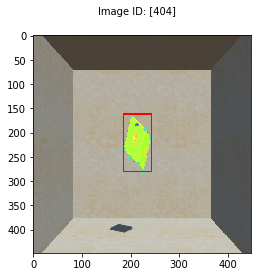

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

num_classes = 2

dataset = CubeDataset('data/keypoints_data', transforms.Compose([Rescale(448), ToTensor()]))

data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True, num_workers=8,
    collate_fn=utils.collate_fn)

idx = random.randint(0, len(dataset)-1)

vis.vis_one(dataset[idx][0], dataset[idx][1])

## Model

In [3]:
# get pretrained model
model = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained=True)

# reinitialize roi_heads for box predictor and keypoint predictor
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
model.roi_heads.keypoint_predictor = KeypointRCNNPredictor(512, 8)

# eventually load pretrained model
#model.load_state_dict(torch.load('model', map_location=device))

model.to(device);

## Optimizer, scheduler

In [4]:
params = [p for p in model.parameters() if p.requires_grad]

optimizer = torch.optim.SGD(params, lr=0.008, momentum=0.9, weight_decay=0.0005)

lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

## Training

In [5]:
fit(model, optimizer, data_loader, device, 20, lr_scheduler)

loss_classifier 0.51488 loss_box_reg 0.04587 loss_keypoint 8.06799 loss_objectness 0.06720 loss_rpn_box_reg 0.00786 
loss_classifier 0.29233 loss_box_reg 0.04799 loss_keypoint 8.01416 loss_objectness 0.10155 loss_rpn_box_reg 0.00694 
loss_classifier 0.13210 loss_box_reg 0.04880 loss_keypoint 8.05770 loss_objectness 0.06750 loss_rpn_box_reg 0.00381 
loss_classifier 0.08578 loss_box_reg 0.05224 loss_keypoint 8.02958 loss_objectness 0.03602 loss_rpn_box_reg 0.00376 
loss_classifier 0.11256 loss_box_reg 0.08820 loss_keypoint 8.01254 loss_objectness 0.07367 loss_rpn_box_reg 0.00734 
loss_classifier 0.11437 loss_box_reg 0.07690 loss_keypoint 8.02734 loss_objectness 0.04471 loss_rpn_box_reg 0.00507 
loss_classifier 0.10145 loss_box_reg 0.07322 loss_keypoint 8.01139 loss_objectness 0.05398 loss_rpn_box_reg 0.00701 
loss_classifier 0.10285 loss_box_reg 0.07038 loss_keypoint 8.01873 loss_objectness 0.04948 loss_rpn_box_reg 0.00593 
loss_classifier 0.12235 loss_box_reg 0.09441 loss_keypoint 8.020

loss_classifier 0.11044 loss_box_reg 0.07407 loss_keypoint 8.03652 loss_objectness 0.04260 loss_rpn_box_reg 0.00419 
loss_classifier 0.09907 loss_box_reg 0.07692 loss_keypoint 8.00791 loss_objectness 0.07312 loss_rpn_box_reg 0.00874 
loss_classifier 0.12539 loss_box_reg 0.08739 loss_keypoint 8.03195 loss_objectness 0.05114 loss_rpn_box_reg 0.00422 
loss_classifier 0.11171 loss_box_reg 0.07408 loss_keypoint 8.03610 loss_objectness 0.02692 loss_rpn_box_reg 0.00301 
loss_classifier 0.09369 loss_box_reg 0.05951 loss_keypoint 8.03804 loss_objectness 0.05392 loss_rpn_box_reg 0.00437 
loss_classifier 0.09061 loss_box_reg 0.05991 loss_keypoint 8.03168 loss_objectness 0.02309 loss_rpn_box_reg 0.00182 
loss_classifier 0.07929 loss_box_reg 0.05094 loss_keypoint 8.02103 loss_objectness 0.04313 loss_rpn_box_reg 0.00724 
loss_classifier 0.09970 loss_box_reg 0.06780 loss_keypoint 8.04185 loss_objectness 0.02465 loss_rpn_box_reg 0.00554 
loss_classifier 0.07529 loss_box_reg 0.04767 loss_keypoint 8.069

loss_classifier 0.09384 loss_box_reg 0.06735 loss_keypoint 8.01269 loss_objectness 0.04070 loss_rpn_box_reg 0.00568 
loss_classifier 0.11295 loss_box_reg 0.09711 loss_keypoint 8.02660 loss_objectness 0.04620 loss_rpn_box_reg 0.00725 
loss_classifier 0.10962 loss_box_reg 0.08306 loss_keypoint 8.01809 loss_objectness 0.02735 loss_rpn_box_reg 0.00455 
loss_classifier 0.10117 loss_box_reg 0.06640 loss_keypoint 8.02969 loss_objectness 0.03324 loss_rpn_box_reg 0.00460 
loss_classifier 0.08192 loss_box_reg 0.05752 loss_keypoint 8.01402 loss_objectness 0.04150 loss_rpn_box_reg 0.00339 
loss_classifier 0.10363 loss_box_reg 0.07997 loss_keypoint 8.00363 loss_objectness 0.01878 loss_rpn_box_reg 0.00201 
loss_classifier 0.09695 loss_box_reg 0.06221 loss_keypoint 8.02614 loss_objectness 0.03277 loss_rpn_box_reg 0.00272 
loss_classifier 0.11175 loss_box_reg 0.07882 loss_keypoint 8.02783 loss_objectness 0.06470 loss_rpn_box_reg 0.00955 
loss_classifier 0.11147 loss_box_reg 0.08482 loss_keypoint 8.018

loss_classifier 0.11400 loss_box_reg 0.08151 loss_keypoint 7.98891 loss_objectness 0.09407 loss_rpn_box_reg 0.01157 
loss_classifier 0.09998 loss_box_reg 0.05825 loss_keypoint 8.05549 loss_objectness 0.04111 loss_rpn_box_reg 0.00561 
loss_classifier 0.08414 loss_box_reg 0.06415 loss_keypoint 8.05663 loss_objectness 0.03852 loss_rpn_box_reg 0.00403 
loss_classifier 0.12041 loss_box_reg 0.08132 loss_keypoint 8.03953 loss_objectness 0.08001 loss_rpn_box_reg 0.01125 
loss_classifier 0.08841 loss_box_reg 0.05424 loss_keypoint 8.00262 loss_objectness 0.06032 loss_rpn_box_reg 0.00704 
loss_classifier 0.10610 loss_box_reg 0.06939 loss_keypoint 8.00701 loss_objectness 0.04959 loss_rpn_box_reg 0.00446 
loss_classifier 0.08875 loss_box_reg 0.05358 loss_keypoint 8.02117 loss_objectness 0.03468 loss_rpn_box_reg 0.00357 
loss_classifier 0.11069 loss_box_reg 0.06995 loss_keypoint 8.02596 loss_objectness 0.05264 loss_rpn_box_reg 0.00621 
loss_classifier 0.11425 loss_box_reg 0.09629 loss_keypoint 8.087

loss_classifier 0.10600 loss_box_reg 0.06968 loss_keypoint 8.02371 loss_objectness 0.05495 loss_rpn_box_reg 0.00564 
loss_classifier 0.07930 loss_box_reg 0.04566 loss_keypoint 8.05462 loss_objectness 0.05097 loss_rpn_box_reg 0.00706 
loss_classifier 0.08709 loss_box_reg 0.05735 loss_keypoint 8.01646 loss_objectness 0.01347 loss_rpn_box_reg 0.00233 
loss_classifier 0.10478 loss_box_reg 0.07878 loss_keypoint 8.00440 loss_objectness 0.07194 loss_rpn_box_reg 0.00760 
loss_classifier 0.09009 loss_box_reg 0.06125 loss_keypoint 7.98243 loss_objectness 0.01992 loss_rpn_box_reg 0.00206 
loss_classifier 0.08748 loss_box_reg 0.05984 loss_keypoint 8.02232 loss_objectness 0.12595 loss_rpn_box_reg 0.02039 
loss_classifier 0.09485 loss_box_reg 0.06498 loss_keypoint 8.01757 loss_objectness 0.01985 loss_rpn_box_reg 0.00256 
loss_classifier 0.09953 loss_box_reg 0.07407 loss_keypoint 8.02178 loss_objectness 0.01640 loss_rpn_box_reg 0.00161 
loss_classifier 0.09120 loss_box_reg 0.06761 loss_keypoint 8.043

loss_classifier 0.09657 loss_box_reg 0.05803 loss_keypoint 8.00041 loss_objectness 0.04484 loss_rpn_box_reg 0.00342 
loss_classifier 0.10485 loss_box_reg 0.07153 loss_keypoint 8.02519 loss_objectness 0.03914 loss_rpn_box_reg 0.00573 
loss_classifier 0.10259 loss_box_reg 0.07676 loss_keypoint 8.03807 loss_objectness 0.01643 loss_rpn_box_reg 0.00380 
loss_classifier 0.10644 loss_box_reg 0.07504 loss_keypoint 7.99552 loss_objectness 0.03878 loss_rpn_box_reg 0.00310 
loss_classifier 0.09444 loss_box_reg 0.05641 loss_keypoint 8.04519 loss_objectness 0.03951 loss_rpn_box_reg 0.00394 
loss_classifier 0.09157 loss_box_reg 0.06166 loss_keypoint 8.03722 loss_objectness 0.01286 loss_rpn_box_reg 0.00325 
loss_classifier 0.08446 loss_box_reg 0.05678 loss_keypoint 8.01317 loss_objectness 0.02332 loss_rpn_box_reg 0.00356 
loss_classifier 0.11016 loss_box_reg 0.07857 loss_keypoint 7.97491 loss_objectness 0.14699 loss_rpn_box_reg 0.02063 
loss_classifier 0.10811 loss_box_reg 0.07374 loss_keypoint 7.988

loss_classifier 0.08158 loss_box_reg 0.05110 loss_keypoint 7.99516 loss_objectness 0.01099 loss_rpn_box_reg 0.00356 
loss_classifier 0.12338 loss_box_reg 0.08917 loss_keypoint 8.02027 loss_objectness 0.06527 loss_rpn_box_reg 0.00608 
loss_classifier 0.09036 loss_box_reg 0.06411 loss_keypoint 8.01706 loss_objectness 0.03087 loss_rpn_box_reg 0.00402 
loss_classifier 0.10481 loss_box_reg 0.06290 loss_keypoint 8.07079 loss_objectness 0.04511 loss_rpn_box_reg 0.00602 
loss_classifier 0.09794 loss_box_reg 0.06493 loss_keypoint 8.05607 loss_objectness 0.03547 loss_rpn_box_reg 0.00449 
loss_classifier 0.08884 loss_box_reg 0.06331 loss_keypoint 8.03458 loss_objectness 0.02524 loss_rpn_box_reg 0.00344 
loss_classifier 0.09195 loss_box_reg 0.08140 loss_keypoint 8.00937 loss_objectness 0.03549 loss_rpn_box_reg 0.00614 
loss_classifier 0.06752 loss_box_reg 0.03635 loss_keypoint 8.03017 loss_objectness 0.02280 loss_rpn_box_reg 0.00402 
loss_classifier 0.10515 loss_box_reg 0.07047 loss_keypoint 8.043

loss_classifier 0.11459 loss_box_reg 0.08293 loss_keypoint 8.03868 loss_objectness 0.08785 loss_rpn_box_reg 0.01012 
loss_classifier 0.09738 loss_box_reg 0.06231 loss_keypoint 8.01311 loss_objectness 0.04551 loss_rpn_box_reg 0.00588 
loss_classifier 0.11323 loss_box_reg 0.07622 loss_keypoint 8.05221 loss_objectness 0.05356 loss_rpn_box_reg 0.00334 
loss_classifier 0.10728 loss_box_reg 0.07686 loss_keypoint 8.01492 loss_objectness 0.04073 loss_rpn_box_reg 0.00360 
loss_classifier 0.09421 loss_box_reg 0.06622 loss_keypoint 8.02591 loss_objectness 0.02751 loss_rpn_box_reg 0.00335 
loss_classifier 0.10533 loss_box_reg 0.08022 loss_keypoint 7.96943 loss_objectness 0.01691 loss_rpn_box_reg 0.00222 
loss_classifier 0.10337 loss_box_reg 0.07087 loss_keypoint 8.00189 loss_objectness 0.03923 loss_rpn_box_reg 0.00508 
loss_classifier 0.08590 loss_box_reg 0.06420 loss_keypoint 8.03230 loss_objectness 0.02072 loss_rpn_box_reg 0.00247 
loss_classifier 0.10098 loss_box_reg 0.06398 loss_keypoint 8.020

loss_classifier 0.09686 loss_box_reg 0.07966 loss_keypoint 8.02664 loss_objectness 0.05113 loss_rpn_box_reg 0.00944 
loss_classifier 0.08936 loss_box_reg 0.05533 loss_keypoint 8.04195 loss_objectness 0.02784 loss_rpn_box_reg 0.00297 
loss_classifier 0.10066 loss_box_reg 0.06925 loss_keypoint 8.04627 loss_objectness 0.04294 loss_rpn_box_reg 0.00461 
loss_classifier 0.10081 loss_box_reg 0.06836 loss_keypoint 8.00885 loss_objectness 0.02652 loss_rpn_box_reg 0.00387 
loss_classifier 0.08491 loss_box_reg 0.05763 loss_keypoint 8.02850 loss_objectness 0.01169 loss_rpn_box_reg 0.00228 
loss_classifier 0.09039 loss_box_reg 0.05861 loss_keypoint 7.97950 loss_objectness 0.06309 loss_rpn_box_reg 0.00615 
loss_classifier 0.09889 loss_box_reg 0.06505 loss_keypoint 8.02807 loss_objectness 0.02746 loss_rpn_box_reg 0.00393 
loss_classifier 0.06531 loss_box_reg 0.03310 loss_keypoint 8.03457 loss_objectness 0.02697 loss_rpn_box_reg 0.00237 
loss_classifier 0.12341 loss_box_reg 0.08929 loss_keypoint 8.021

loss_classifier 0.10030 loss_box_reg 0.08393 loss_keypoint 7.99755 loss_objectness 0.14499 loss_rpn_box_reg 0.02305 
loss_classifier 0.09764 loss_box_reg 0.07464 loss_keypoint 8.06018 loss_objectness 0.01492 loss_rpn_box_reg 0.00151 
loss_classifier 0.09636 loss_box_reg 0.06894 loss_keypoint 8.02566 loss_objectness 0.05636 loss_rpn_box_reg 0.00754 
loss_classifier 0.10119 loss_box_reg 0.07293 loss_keypoint 8.04089 loss_objectness 0.04350 loss_rpn_box_reg 0.00610 
loss_classifier 0.10581 loss_box_reg 0.08801 loss_keypoint 8.03450 loss_objectness 0.02283 loss_rpn_box_reg 0.00522 
loss_classifier 0.10763 loss_box_reg 0.07597 loss_keypoint 8.06803 loss_objectness 0.05560 loss_rpn_box_reg 0.00773 
loss_classifier 0.09875 loss_box_reg 0.07149 loss_keypoint 8.00693 loss_objectness 0.02331 loss_rpn_box_reg 0.00390 
loss_classifier 0.11524 loss_box_reg 0.07571 loss_keypoint 8.02756 loss_objectness 0.04613 loss_rpn_box_reg 0.00445 
loss_classifier 0.10335 loss_box_reg 0.06907 loss_keypoint 8.018

loss_classifier 0.10320 loss_box_reg 0.07956 loss_keypoint 8.01975 loss_objectness 0.04535 loss_rpn_box_reg 0.00508 
loss_classifier 0.11343 loss_box_reg 0.07869 loss_keypoint 8.02952 loss_objectness 0.04897 loss_rpn_box_reg 0.00483 
loss_classifier 0.09864 loss_box_reg 0.07502 loss_keypoint 8.02800 loss_objectness 0.04271 loss_rpn_box_reg 0.00991 
loss_classifier 0.09512 loss_box_reg 0.07018 loss_keypoint 8.03543 loss_objectness 0.02224 loss_rpn_box_reg 0.00153 
loss_classifier 0.10303 loss_box_reg 0.06569 loss_keypoint 8.04211 loss_objectness 0.06624 loss_rpn_box_reg 0.00517 
loss_classifier 0.10459 loss_box_reg 0.07032 loss_keypoint 8.02347 loss_objectness 0.09271 loss_rpn_box_reg 0.01108 
loss_classifier 0.10649 loss_box_reg 0.07968 loss_keypoint 8.06251 loss_objectness 0.04396 loss_rpn_box_reg 0.00563 
loss_classifier 0.11026 loss_box_reg 0.09614 loss_keypoint 8.04150 loss_objectness 0.04200 loss_rpn_box_reg 0.00427 
loss_classifier 0.10356 loss_box_reg 0.07096 loss_keypoint 8.015

loss_classifier 0.10342 loss_box_reg 0.06966 loss_keypoint 8.01480 loss_objectness 0.03611 loss_rpn_box_reg 0.00396 
loss_classifier 0.09303 loss_box_reg 0.06415 loss_keypoint 8.01746 loss_objectness 0.02039 loss_rpn_box_reg 0.00250 
loss_classifier 0.09620 loss_box_reg 0.07534 loss_keypoint 8.05208 loss_objectness 0.01689 loss_rpn_box_reg 0.00508 
loss_classifier 0.09963 loss_box_reg 0.06698 loss_keypoint 8.05079 loss_objectness 0.07727 loss_rpn_box_reg 0.01041 
loss_classifier 0.08322 loss_box_reg 0.05200 loss_keypoint 8.02145 loss_objectness 0.02885 loss_rpn_box_reg 0.00467 
loss_classifier 0.09990 loss_box_reg 0.05940 loss_keypoint 7.99429 loss_objectness 0.02617 loss_rpn_box_reg 0.00234 
loss_classifier 0.11557 loss_box_reg 0.09207 loss_keypoint 7.99684 loss_objectness 0.03231 loss_rpn_box_reg 0.00463 
loss_classifier 0.11040 loss_box_reg 0.06936 loss_keypoint 8.01730 loss_objectness 0.02610 loss_rpn_box_reg 0.00351 
loss_classifier 0.11007 loss_box_reg 0.07356 loss_keypoint 8.041

loss_classifier 0.09539 loss_box_reg 0.07731 loss_keypoint 8.02679 loss_objectness 0.06619 loss_rpn_box_reg 0.00749 
loss_classifier 0.11470 loss_box_reg 0.08129 loss_keypoint 8.01856 loss_objectness 0.03819 loss_rpn_box_reg 0.00553 
loss_classifier 0.11501 loss_box_reg 0.08479 loss_keypoint 8.00489 loss_objectness 0.05068 loss_rpn_box_reg 0.00618 
loss_classifier 0.09628 loss_box_reg 0.06048 loss_keypoint 7.98911 loss_objectness 0.02653 loss_rpn_box_reg 0.00250 
loss_classifier 0.08979 loss_box_reg 0.06227 loss_keypoint 8.00721 loss_objectness 0.01774 loss_rpn_box_reg 0.00358 
loss_classifier 0.08377 loss_box_reg 0.04931 loss_keypoint 8.03771 loss_objectness 0.02198 loss_rpn_box_reg 0.00431 
loss_classifier 0.11736 loss_box_reg 0.07293 loss_keypoint 8.04724 loss_objectness 0.03557 loss_rpn_box_reg 0.00427 
loss_classifier 0.10570 loss_box_reg 0.07967 loss_keypoint 8.03061 loss_objectness 0.09860 loss_rpn_box_reg 0.01197 
loss_classifier 0.08300 loss_box_reg 0.05514 loss_keypoint 8.054

loss_classifier 0.11145 loss_box_reg 0.07750 loss_keypoint 8.01992 loss_objectness 0.06408 loss_rpn_box_reg 0.00539 
loss_classifier 0.10202 loss_box_reg 0.07967 loss_keypoint 8.02867 loss_objectness 0.04100 loss_rpn_box_reg 0.00512 
loss_classifier 0.12815 loss_box_reg 0.08742 loss_keypoint 7.99781 loss_objectness 0.02328 loss_rpn_box_reg 0.00365 
loss_classifier 0.10146 loss_box_reg 0.07633 loss_keypoint 8.03073 loss_objectness 0.02138 loss_rpn_box_reg 0.00236 
loss_classifier 0.07508 loss_box_reg 0.05064 loss_keypoint 8.01978 loss_objectness 0.05415 loss_rpn_box_reg 0.01161 
loss_classifier 0.08661 loss_box_reg 0.05888 loss_keypoint 8.01077 loss_objectness 0.02361 loss_rpn_box_reg 0.00455 
loss_classifier 0.09686 loss_box_reg 0.06194 loss_keypoint 8.02700 loss_objectness 0.09708 loss_rpn_box_reg 0.01792 
loss_classifier 0.06897 loss_box_reg 0.03592 loss_keypoint 8.01416 loss_objectness 0.06605 loss_rpn_box_reg 0.01208 
loss_classifier 0.09990 loss_box_reg 0.06036 loss_keypoint 8.012

loss_classifier 0.11079 loss_box_reg 0.07619 loss_keypoint 8.03329 loss_objectness 0.05351 loss_rpn_box_reg 0.00646 
loss_classifier 0.08658 loss_box_reg 0.05349 loss_keypoint 8.01674 loss_objectness 0.02483 loss_rpn_box_reg 0.00374 
loss_classifier 0.11730 loss_box_reg 0.08744 loss_keypoint 8.00607 loss_objectness 0.02760 loss_rpn_box_reg 0.00308 
loss_classifier 0.10942 loss_box_reg 0.07902 loss_keypoint 7.98446 loss_objectness 0.02821 loss_rpn_box_reg 0.00559 
loss_classifier 0.08356 loss_box_reg 0.05556 loss_keypoint 8.04605 loss_objectness 0.01798 loss_rpn_box_reg 0.00180 
loss_classifier 0.08141 loss_box_reg 0.04970 loss_keypoint 8.01498 loss_objectness 0.02602 loss_rpn_box_reg 0.00454 
loss_classifier 0.10661 loss_box_reg 0.07141 loss_keypoint 8.00911 loss_objectness 0.02955 loss_rpn_box_reg 0.00718 
loss_classifier 0.10308 loss_box_reg 0.06805 loss_keypoint 7.98483 loss_objectness 0.03165 loss_rpn_box_reg 0.00423 
loss_classifier 0.10388 loss_box_reg 0.07665 loss_keypoint 8.011

loss_classifier 0.07107 loss_box_reg 0.04081 loss_keypoint 8.01610 loss_objectness 0.03553 loss_rpn_box_reg 0.00582 
loss_classifier 0.10278 loss_box_reg 0.08158 loss_keypoint 7.97483 loss_objectness 0.02994 loss_rpn_box_reg 0.00323 
loss_classifier 0.07404 loss_box_reg 0.05190 loss_keypoint 7.98832 loss_objectness 0.03817 loss_rpn_box_reg 0.00524 
loss_classifier 0.11274 loss_box_reg 0.08041 loss_keypoint 8.03255 loss_objectness 0.03646 loss_rpn_box_reg 0.00653 
loss_classifier 0.09431 loss_box_reg 0.06097 loss_keypoint 8.00241 loss_objectness 0.11289 loss_rpn_box_reg 0.01544 
loss_classifier 0.11498 loss_box_reg 0.09464 loss_keypoint 8.01391 loss_objectness 0.08640 loss_rpn_box_reg 0.01319 
loss_classifier 0.09546 loss_box_reg 0.06396 loss_keypoint 7.98978 loss_objectness 0.04875 loss_rpn_box_reg 0.00466 
loss_classifier 0.09530 loss_box_reg 0.06204 loss_keypoint 8.00295 loss_objectness 0.03228 loss_rpn_box_reg 0.00247 
loss_classifier 0.08663 loss_box_reg 0.06228 loss_keypoint 7.996

loss_classifier 0.10925 loss_box_reg 0.07566 loss_keypoint 8.01030 loss_objectness 0.05262 loss_rpn_box_reg 0.00759 
loss_classifier 0.09032 loss_box_reg 0.05933 loss_keypoint 8.01259 loss_objectness 0.02454 loss_rpn_box_reg 0.00269 
loss_classifier 0.11028 loss_box_reg 0.07756 loss_keypoint 8.03352 loss_objectness 0.03312 loss_rpn_box_reg 0.00265 
loss_classifier 0.11292 loss_box_reg 0.08548 loss_keypoint 8.02528 loss_objectness 0.06777 loss_rpn_box_reg 0.00773 
loss_classifier 0.09708 loss_box_reg 0.07146 loss_keypoint 7.98889 loss_objectness 0.14274 loss_rpn_box_reg 0.02351 
loss_classifier 0.10998 loss_box_reg 0.07273 loss_keypoint 8.02851 loss_objectness 0.04521 loss_rpn_box_reg 0.00361 
loss_classifier 0.07267 loss_box_reg 0.04309 loss_keypoint 8.01420 loss_objectness 0.04728 loss_rpn_box_reg 0.00594 
loss_classifier 0.10295 loss_box_reg 0.06913 loss_keypoint 7.99266 loss_objectness 0.05418 loss_rpn_box_reg 0.00722 
loss_classifier 0.09230 loss_box_reg 0.05886 loss_keypoint 8.007

loss_classifier 0.09404 loss_box_reg 0.05981 loss_keypoint 8.01795 loss_objectness 0.03594 loss_rpn_box_reg 0.00470 
loss_classifier 0.09574 loss_box_reg 0.06441 loss_keypoint 8.02614 loss_objectness 0.03430 loss_rpn_box_reg 0.00328 
loss_classifier 0.09887 loss_box_reg 0.07114 loss_keypoint 7.99936 loss_objectness 0.02731 loss_rpn_box_reg 0.00341 
loss_classifier 0.08609 loss_box_reg 0.07061 loss_keypoint 7.97518 loss_objectness 0.02931 loss_rpn_box_reg 0.00482 
loss_classifier 0.08521 loss_box_reg 0.05806 loss_keypoint 8.00957 loss_objectness 0.05768 loss_rpn_box_reg 0.00592 
loss_classifier 0.11473 loss_box_reg 0.08193 loss_keypoint 8.06117 loss_objectness 0.05853 loss_rpn_box_reg 0.00460 
loss_classifier 0.08990 loss_box_reg 0.06364 loss_keypoint 8.02782 loss_objectness 0.02501 loss_rpn_box_reg 0.00425 
loss_classifier 0.10910 loss_box_reg 0.07237 loss_keypoint 8.00577 loss_objectness 0.03161 loss_rpn_box_reg 0.00520 
loss_classifier 0.10604 loss_box_reg 0.07938 loss_keypoint 8.055

loss_classifier 0.10445 loss_box_reg 0.07924 loss_keypoint 8.00318 loss_objectness 0.04255 loss_rpn_box_reg 0.00439 
loss_classifier 0.11389 loss_box_reg 0.07709 loss_keypoint 8.03209 loss_objectness 0.05504 loss_rpn_box_reg 0.00856 
loss_classifier 0.06995 loss_box_reg 0.04193 loss_keypoint 8.00679 loss_objectness 0.01369 loss_rpn_box_reg 0.00366 
loss_classifier 0.10280 loss_box_reg 0.06788 loss_keypoint 8.02036 loss_objectness 0.04511 loss_rpn_box_reg 0.00394 
loss_classifier 0.11578 loss_box_reg 0.07956 loss_keypoint 8.02534 loss_objectness 0.02420 loss_rpn_box_reg 0.00374 
loss_classifier 0.11836 loss_box_reg 0.08340 loss_keypoint 7.98938 loss_objectness 0.01864 loss_rpn_box_reg 0.00194 
loss_classifier 0.12025 loss_box_reg 0.07330 loss_keypoint 8.01836 loss_objectness 0.06959 loss_rpn_box_reg 0.00885 
loss_classifier 0.09702 loss_box_reg 0.07406 loss_keypoint 8.03452 loss_objectness 0.02917 loss_rpn_box_reg 0.00516 
loss_classifier 0.10334 loss_box_reg 0.06933 loss_keypoint 7.983

loss_classifier 0.09259 loss_box_reg 0.07826 loss_keypoint 8.00525 loss_objectness 0.06509 loss_rpn_box_reg 0.01198 
loss_classifier 0.09732 loss_box_reg 0.06726 loss_keypoint 8.05170 loss_objectness 0.02557 loss_rpn_box_reg 0.00440 
loss_classifier 0.08883 loss_box_reg 0.06752 loss_keypoint 8.01065 loss_objectness 0.06396 loss_rpn_box_reg 0.01170 
loss_classifier 0.10082 loss_box_reg 0.07647 loss_keypoint 8.02812 loss_objectness 0.04576 loss_rpn_box_reg 0.00604 
loss_classifier 0.10850 loss_box_reg 0.09393 loss_keypoint 8.00643 loss_objectness 0.04607 loss_rpn_box_reg 0.00497 
loss_classifier 0.10906 loss_box_reg 0.07183 loss_keypoint 8.00401 loss_objectness 0.04630 loss_rpn_box_reg 0.00323 
loss_classifier 0.10285 loss_box_reg 0.07702 loss_keypoint 8.02262 loss_objectness 0.03573 loss_rpn_box_reg 0.00453 
loss_classifier 0.11361 loss_box_reg 0.08777 loss_keypoint 8.02576 loss_objectness 0.02333 loss_rpn_box_reg 0.00397 
loss_classifier 0.09640 loss_box_reg 0.07190 loss_keypoint 8.023

loss_classifier 0.09207 loss_box_reg 0.06628 loss_keypoint 8.00890 loss_objectness 0.02452 loss_rpn_box_reg 0.00273 
loss_classifier 0.11320 loss_box_reg 0.08527 loss_keypoint 7.99055 loss_objectness 0.05728 loss_rpn_box_reg 0.00517 
loss_classifier 0.09861 loss_box_reg 0.07330 loss_keypoint 8.01833 loss_objectness 0.04301 loss_rpn_box_reg 0.00510 
loss_classifier 0.08503 loss_box_reg 0.06343 loss_keypoint 8.02998 loss_objectness 0.02998 loss_rpn_box_reg 0.00479 
loss_classifier 0.11930 loss_box_reg 0.08403 loss_keypoint 8.03111 loss_objectness 0.05043 loss_rpn_box_reg 0.00506 
loss_classifier 0.08843 loss_box_reg 0.05077 loss_keypoint 8.02351 loss_objectness 0.03168 loss_rpn_box_reg 0.00371 
loss_classifier 0.10051 loss_box_reg 0.07440 loss_keypoint 8.03186 loss_objectness 0.02136 loss_rpn_box_reg 0.00238 
loss_classifier 0.11482 loss_box_reg 0.08447 loss_keypoint 8.01486 loss_objectness 0.03515 loss_rpn_box_reg 0.00699 
loss_classifier 0.08961 loss_box_reg 0.05178 loss_keypoint 8.008

loss_classifier 0.10245 loss_box_reg 0.06903 loss_keypoint 7.99895 loss_objectness 0.07485 loss_rpn_box_reg 0.01070 
loss_classifier 0.11460 loss_box_reg 0.08601 loss_keypoint 7.99714 loss_objectness 0.04247 loss_rpn_box_reg 0.00419 
loss_classifier 0.11047 loss_box_reg 0.08054 loss_keypoint 8.02018 loss_objectness 0.04008 loss_rpn_box_reg 0.00345 
loss_classifier 0.10182 loss_box_reg 0.07188 loss_keypoint 8.03847 loss_objectness 0.04267 loss_rpn_box_reg 0.00535 
loss_classifier 0.09848 loss_box_reg 0.07160 loss_keypoint 8.04321 loss_objectness 0.03260 loss_rpn_box_reg 0.00321 
loss_classifier 0.10861 loss_box_reg 0.08251 loss_keypoint 8.01224 loss_objectness 0.01256 loss_rpn_box_reg 0.00220 
loss_classifier 0.10705 loss_box_reg 0.08221 loss_keypoint 7.98925 loss_objectness 0.03198 loss_rpn_box_reg 0.00279 
loss_classifier 0.09969 loss_box_reg 0.05803 loss_keypoint 8.05566 loss_objectness 0.04189 loss_rpn_box_reg 0.00649 
loss_classifier 0.09391 loss_box_reg 0.07069 loss_keypoint 7.976

loss_classifier 0.11262 loss_box_reg 0.07155 loss_keypoint 8.00691 loss_objectness 0.09484 loss_rpn_box_reg 0.01002 
loss_classifier 0.07161 loss_box_reg 0.04564 loss_keypoint 8.01218 loss_objectness 0.02606 loss_rpn_box_reg 0.00308 
loss_classifier 0.08033 loss_box_reg 0.05174 loss_keypoint 8.03942 loss_objectness 0.03847 loss_rpn_box_reg 0.00482 
loss_classifier 0.08794 loss_box_reg 0.05482 loss_keypoint 8.00490 loss_objectness 0.02622 loss_rpn_box_reg 0.00342 
loss_classifier 0.09906 loss_box_reg 0.07661 loss_keypoint 8.04451 loss_objectness 0.02207 loss_rpn_box_reg 0.00314 
loss_classifier 0.08848 loss_box_reg 0.06256 loss_keypoint 8.02250 loss_objectness 0.02929 loss_rpn_box_reg 0.00380 
loss_classifier 0.12824 loss_box_reg 0.10197 loss_keypoint 7.99010 loss_objectness 0.04955 loss_rpn_box_reg 0.00944 
loss_classifier 0.09993 loss_box_reg 0.05928 loss_keypoint 8.01634 loss_objectness 0.09021 loss_rpn_box_reg 0.00987 
loss_classifier 0.08528 loss_box_reg 0.05240 loss_keypoint 7.995

KeyboardInterrupt: 

In [5]:
num_of_epochs = 10

for epoch in range(num_of_epochs):
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)

    lr_scheduler.step()

torch.save(model.state_dict(), 'model')

Epoch: [0]  [  0/484]  eta: 0:55:39  lr: 0.000025  loss: 8.8827 (8.8827)  loss_classifier: 0.6765 (0.6765)  loss_box_reg: 0.0420 (0.0420)  loss_keypoint: 8.0565 (8.0565)  loss_objectness: 0.1009 (0.1009)  loss_rpn_box_reg: 0.0068 (0.0068)  time: 6.8994  data: 4.2013  max mem: 1764
Epoch: [0]  [ 10/484]  eta: 0:13:10  lr: 0.000190  loss: 8.8581 (8.8272)  loss_classifier: 0.6430 (0.6130)  loss_box_reg: 0.0387 (0.0386)  loss_keypoint: 8.0709 (8.0670)  loss_objectness: 0.0861 (0.1013)  loss_rpn_box_reg: 0.0073 (0.0073)  time: 1.6675  data: 0.3820  max mem: 2099
Epoch: [0]  [ 20/484]  eta: 0:11:11  lr: 0.000355  loss: 8.6798 (8.6768)  loss_classifier: 0.4285 (0.4539)  loss_box_reg: 0.0433 (0.0472)  loss_keypoint: 8.0709 (8.0696)  loss_objectness: 0.0861 (0.0989)  loss_rpn_box_reg: 0.0067 (0.0071)  time: 1.1751  data: 0.0025  max mem: 2101
Epoch: [0]  [ 30/484]  eta: 0:10:27  lr: 0.000521  loss: 8.3570 (8.5476)  loss_classifier: 0.1477 (0.3448)  loss_box_reg: 0.0647 (0.0549)  loss_keypoint: 

Epoch: [0]  [290/484]  eta: 0:04:19  lr: 0.004823  loss: 2.7421 (4.5505)  loss_classifier: 0.0194 (0.0769)  loss_box_reg: 0.0094 (0.0553)  loss_keypoint: 2.7119 (4.4042)  loss_objectness: 0.0000 (0.0105)  loss_rpn_box_reg: 0.0020 (0.0035)  time: 1.3741  data: 0.0000  max mem: 2344
Epoch: [0]  [300/484]  eta: 0:04:06  lr: 0.004989  loss: 2.7342 (4.4932)  loss_classifier: 0.0193 (0.0751)  loss_box_reg: 0.0093 (0.0538)  loss_keypoint: 2.7069 (4.3506)  loss_objectness: 0.0000 (0.0102)  loss_rpn_box_reg: 0.0020 (0.0035)  time: 1.3610  data: 0.0008  max mem: 2344
Epoch: [0]  [310/484]  eta: 0:03:53  lr: 0.005154  loss: 2.7374 (4.4371)  loss_classifier: 0.0193 (0.0733)  loss_box_reg: 0.0085 (0.0524)  loss_keypoint: 2.7090 (4.2981)  loss_objectness: 0.0000 (0.0099)  loss_rpn_box_reg: 0.0020 (0.0035)  time: 1.4024  data: 0.0040  max mem: 2344
Epoch: [0]  [320/484]  eta: 0:03:40  lr: 0.005319  loss: 2.7374 (4.3867)  loss_classifier: 0.0187 (0.0716)  loss_box_reg: 0.0081 (0.0510)  loss_keypoint: 

Epoch: [1]  [ 70/484]  eta: 0:10:05  lr: 0.008000  loss: 2.7217 (2.7366)  loss_classifier: 0.0147 (0.0155)  loss_box_reg: 0.0047 (0.0053)  loss_keypoint: 2.7032 (2.7134)  loss_objectness: 0.0000 (0.0003)  loss_rpn_box_reg: 0.0016 (0.0020)  time: 1.4599  data: 0.0018  max mem: 2344
Epoch: [1]  [ 80/484]  eta: 0:09:47  lr: 0.008000  loss: 2.5962 (2.7089)  loss_classifier: 0.0144 (0.0153)  loss_box_reg: 0.0038 (0.0051)  loss_keypoint: 2.5824 (2.6862)  loss_objectness: 0.0001 (0.0003)  loss_rpn_box_reg: 0.0013 (0.0020)  time: 1.4136  data: 0.0017  max mem: 2344
Epoch: [1]  [ 90/484]  eta: 0:09:28  lr: 0.008000  loss: 2.6006 (2.7108)  loss_classifier: 0.0126 (0.0151)  loss_box_reg: 0.0034 (0.0049)  loss_keypoint: 2.5837 (2.6886)  loss_objectness: 0.0001 (0.0003)  loss_rpn_box_reg: 0.0014 (0.0019)  time: 1.3728  data: 0.0009  max mem: 2344
Epoch: [1]  [100/484]  eta: 0:09:11  lr: 0.008000  loss: 2.6859 (2.7151)  loss_classifier: 0.0133 (0.0149)  loss_box_reg: 0.0030 (0.0047)  loss_keypoint: 

Epoch: [1]  [360/484]  eta: 0:03:00  lr: 0.008000  loss: 2.5101 (2.6897)  loss_classifier: 0.0113 (0.0129)  loss_box_reg: 0.0025 (0.0041)  loss_keypoint: 2.4963 (2.6706)  loss_objectness: 0.0001 (0.0003)  loss_rpn_box_reg: 0.0013 (0.0019)  time: 1.4857  data: 0.0031  max mem: 2344
Epoch: [1]  [370/484]  eta: 0:02:45  lr: 0.008000  loss: 2.5508 (2.6855)  loss_classifier: 0.0096 (0.0128)  loss_box_reg: 0.0027 (0.0041)  loss_keypoint: 2.5330 (2.6665)  loss_objectness: 0.0001 (0.0003)  loss_rpn_box_reg: 0.0015 (0.0019)  time: 1.5059  data: 0.0019  max mem: 2344
Epoch: [1]  [380/484]  eta: 0:02:31  lr: 0.008000  loss: 2.5998 (2.6850)  loss_classifier: 0.0093 (0.0127)  loss_box_reg: 0.0023 (0.0040)  loss_keypoint: 2.5848 (2.6661)  loss_objectness: 0.0001 (0.0003)  loss_rpn_box_reg: 0.0012 (0.0018)  time: 1.4927  data: 0.0010  max mem: 2344
Epoch: [1]  [390/484]  eta: 0:02:16  lr: 0.008000  loss: 2.6731 (2.6845)  loss_classifier: 0.0102 (0.0127)  loss_box_reg: 0.0024 (0.0040)  loss_keypoint: 

Epoch: [2]  [140/484]  eta: 0:08:12  lr: 0.008000  loss: 2.4328 (2.5009)  loss_classifier: 0.0122 (0.0103)  loss_box_reg: 0.0033 (0.0029)  loss_keypoint: 2.4170 (2.4854)  loss_objectness: 0.0001 (0.0004)  loss_rpn_box_reg: 0.0017 (0.0019)  time: 1.4018  data: 0.0000  max mem: 2344
Epoch: [2]  [150/484]  eta: 0:07:57  lr: 0.008000  loss: 2.5623 (2.5127)  loss_classifier: 0.0107 (0.0103)  loss_box_reg: 0.0029 (0.0029)  loss_keypoint: 2.5465 (2.4973)  loss_objectness: 0.0001 (0.0004)  loss_rpn_box_reg: 0.0013 (0.0019)  time: 1.4111  data: 0.0009  max mem: 2344
Epoch: [2]  [160/484]  eta: 0:07:44  lr: 0.008000  loss: 2.5631 (2.5103)  loss_classifier: 0.0101 (0.0104)  loss_box_reg: 0.0026 (0.0029)  loss_keypoint: 2.5518 (2.4948)  loss_objectness: 0.0001 (0.0004)  loss_rpn_box_reg: 0.0013 (0.0019)  time: 1.4442  data: 0.0025  max mem: 2344
Epoch: [2]  [170/484]  eta: 0:07:29  lr: 0.008000  loss: 2.4896 (2.5111)  loss_classifier: 0.0114 (0.0104)  loss_box_reg: 0.0027 (0.0029)  loss_keypoint: 

Epoch: [2]  [430/484]  eta: 0:01:16  lr: 0.008000  loss: 2.4315 (2.5150)  loss_classifier: 0.0071 (0.0097)  loss_box_reg: 0.0020 (0.0028)  loss_keypoint: 2.4209 (2.5004)  loss_objectness: 0.0001 (0.0003)  loss_rpn_box_reg: 0.0015 (0.0017)  time: 1.4230  data: 0.0025  max mem: 2344
Epoch: [2]  [440/484]  eta: 0:01:02  lr: 0.008000  loss: 2.4061 (2.5132)  loss_classifier: 0.0084 (0.0098)  loss_box_reg: 0.0019 (0.0028)  loss_keypoint: 2.3952 (2.4986)  loss_objectness: 0.0001 (0.0003)  loss_rpn_box_reg: 0.0013 (0.0017)  time: 1.4261  data: 0.0027  max mem: 2344
Epoch: [2]  [450/484]  eta: 0:00:48  lr: 0.008000  loss: 2.3930 (2.5109)  loss_classifier: 0.0087 (0.0097)  loss_box_reg: 0.0022 (0.0028)  loss_keypoint: 2.3792 (2.4963)  loss_objectness: 0.0001 (0.0003)  loss_rpn_box_reg: 0.0013 (0.0017)  time: 1.4253  data: 0.0026  max mem: 2344
Epoch: [2]  [460/484]  eta: 0:00:33  lr: 0.008000  loss: 2.4012 (2.5088)  loss_classifier: 0.0089 (0.0098)  loss_box_reg: 0.0023 (0.0028)  loss_keypoint: 

Epoch: [3]  [210/484]  eta: 0:06:32  lr: 0.000800  loss: 2.2774 (2.3017)  loss_classifier: 0.0069 (0.0079)  loss_box_reg: 0.0014 (0.0017)  loss_keypoint: 2.2650 (2.2907)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0009 (0.0012)  time: 1.3995  data: 0.0009  max mem: 2344
Epoch: [3]  [220/484]  eta: 0:06:18  lr: 0.000800  loss: 2.2437 (2.2986)  loss_classifier: 0.0064 (0.0079)  loss_box_reg: 0.0016 (0.0017)  loss_keypoint: 2.2337 (2.2876)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0011 (0.0012)  time: 1.4299  data: 0.0002  max mem: 2344
Epoch: [3]  [230/484]  eta: 0:06:04  lr: 0.000800  loss: 2.1996 (2.2957)  loss_classifier: 0.0067 (0.0079)  loss_box_reg: 0.0016 (0.0017)  loss_keypoint: 2.1809 (2.2847)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0011 (0.0012)  time: 1.4379  data: 0.0010  max mem: 2344
Epoch: [3]  [240/484]  eta: 0:05:49  lr: 0.000800  loss: 2.2360 (2.2945)  loss_classifier: 0.0071 (0.0078)  loss_box_reg: 0.0016 (0.0017)  loss_keypoint: 

Epoch: [3] Total time: 0:13:08 (1.6295 s / it)
Epoch: [4]  [  0/484]  eta: 0:48:34  lr: 0.000800  loss: 2.1323 (2.1323)  loss_classifier: 0.0098 (0.0098)  loss_box_reg: 0.0008 (0.0008)  loss_keypoint: 2.1209 (2.1209)  loss_objectness: 0.0004 (0.0004)  loss_rpn_box_reg: 0.0004 (0.0004)  time: 6.0212  data: 4.7355  max mem: 2344
Epoch: [4]  [ 10/484]  eta: 0:14:12  lr: 0.000800  loss: 2.2594 (2.2832)  loss_classifier: 0.0069 (0.0072)  loss_box_reg: 0.0020 (0.0017)  loss_keypoint: 2.2479 (2.2727)  loss_objectness: 0.0000 (0.0004)  loss_rpn_box_reg: 0.0011 (0.0012)  time: 1.7991  data: 0.4305  max mem: 2344
Epoch: [4]  [ 20/484]  eta: 0:12:15  lr: 0.000800  loss: 2.2594 (2.2683)  loss_classifier: 0.0063 (0.0070)  loss_box_reg: 0.0014 (0.0015)  loss_keypoint: 2.2479 (2.2582)  loss_objectness: 0.0001 (0.0003)  loss_rpn_box_reg: 0.0011 (0.0013)  time: 1.3627  data: 0.0008  max mem: 2344
Epoch: [4]  [ 30/484]  eta: 0:11:25  lr: 0.000800  loss: 2.2945 (2.2782)  loss_classifier: 0.0067 (0.0072) 

Epoch: [4]  [280/484]  eta: 0:05:27  lr: 0.000800  loss: 2.2281 (2.2430)  loss_classifier: 0.0078 (0.0075)  loss_box_reg: 0.0012 (0.0015)  loss_keypoint: 2.2129 (2.2327)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0010 (0.0012)  time: 1.4182  data: 0.0017  max mem: 2344
Epoch: [4]  [290/484]  eta: 0:05:10  lr: 0.000800  loss: 2.1977 (2.2410)  loss_classifier: 0.0072 (0.0074)  loss_box_reg: 0.0011 (0.0015)  loss_keypoint: 2.1896 (2.2306)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0011 (0.0012)  time: 1.4417  data: 0.0017  max mem: 2344
Epoch: [4]  [300/484]  eta: 0:04:52  lr: 0.000800  loss: 2.2370 (2.2455)  loss_classifier: 0.0063 (0.0074)  loss_box_reg: 0.0012 (0.0015)  loss_keypoint: 2.2302 (2.2351)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0008 (0.0012)  time: 1.4293  data: 0.0021  max mem: 2344
Epoch: [4]  [310/484]  eta: 0:04:35  lr: 0.000800  loss: 2.3335 (2.2489)  loss_classifier: 0.0067 (0.0074)  loss_box_reg: 0.0013 (0.0015)  loss_keypoint: 

Epoch: [5]  [ 60/484]  eta: 0:10:26  lr: 0.000800  loss: 2.2146 (2.2227)  loss_classifier: 0.0062 (0.0071)  loss_box_reg: 0.0013 (0.0014)  loss_keypoint: 2.2054 (2.2132)  loss_objectness: 0.0000 (0.0001)  loss_rpn_box_reg: 0.0008 (0.0010)  time: 1.4128  data: 0.0008  max mem: 2344
Epoch: [5]  [ 70/484]  eta: 0:10:08  lr: 0.000800  loss: 2.2492 (2.2182)  loss_classifier: 0.0062 (0.0069)  loss_box_reg: 0.0015 (0.0015)  loss_keypoint: 2.2402 (2.2086)  loss_objectness: 0.0000 (0.0001)  loss_rpn_box_reg: 0.0009 (0.0010)  time: 1.4157  data: 0.0000  max mem: 2344
Epoch: [5]  [ 80/484]  eta: 0:09:51  lr: 0.000800  loss: 2.2189 (2.2354)  loss_classifier: 0.0053 (0.0069)  loss_box_reg: 0.0015 (0.0015)  loss_keypoint: 2.2081 (2.2259)  loss_objectness: 0.0000 (0.0001)  loss_rpn_box_reg: 0.0008 (0.0010)  time: 1.4222  data: 0.0008  max mem: 2344
Epoch: [5]  [ 90/484]  eta: 0:09:35  lr: 0.000800  loss: 2.2050 (2.2289)  loss_classifier: 0.0067 (0.0069)  loss_box_reg: 0.0013 (0.0015)  loss_keypoint: 

Epoch: [5]  [350/484]  eta: 0:03:12  lr: 0.000800  loss: 2.2052 (2.2305)  loss_classifier: 0.0084 (0.0074)  loss_box_reg: 0.0012 (0.0015)  loss_keypoint: 2.1923 (2.2205)  loss_objectness: 0.0000 (0.0002)  loss_rpn_box_reg: 0.0009 (0.0011)  time: 1.4501  data: 0.0005  max mem: 2344
Epoch: [5]  [360/484]  eta: 0:02:58  lr: 0.000800  loss: 2.1770 (2.2296)  loss_classifier: 0.0084 (0.0074)  loss_box_reg: 0.0011 (0.0015)  loss_keypoint: 2.1645 (2.2195)  loss_objectness: 0.0000 (0.0002)  loss_rpn_box_reg: 0.0009 (0.0011)  time: 1.4549  data: 0.0005  max mem: 2344
Epoch: [5]  [370/484]  eta: 0:02:44  lr: 0.000800  loss: 2.1855 (2.2287)  loss_classifier: 0.0080 (0.0074)  loss_box_reg: 0.0014 (0.0015)  loss_keypoint: 2.1781 (2.2186)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0009 (0.0011)  time: 1.4941  data: 0.0016  max mem: 2344
Epoch: [5]  [380/484]  eta: 0:02:30  lr: 0.000800  loss: 2.1848 (2.2280)  loss_classifier: 0.0083 (0.0074)  loss_box_reg: 0.0014 (0.0015)  loss_keypoint: 

Epoch: [6]  [130/484]  eta: 0:08:36  lr: 0.000080  loss: 2.1943 (2.2139)  loss_classifier: 0.0064 (0.0070)  loss_box_reg: 0.0011 (0.0014)  loss_keypoint: 2.1862 (2.2043)  loss_objectness: 0.0000 (0.0001)  loss_rpn_box_reg: 0.0009 (0.0011)  time: 1.4502  data: 0.0016  max mem: 2344
Epoch: [6]  [140/484]  eta: 0:08:23  lr: 0.000080  loss: 2.1617 (2.2098)  loss_classifier: 0.0058 (0.0071)  loss_box_reg: 0.0010 (0.0014)  loss_keypoint: 2.1458 (2.2002)  loss_objectness: 0.0001 (0.0001)  loss_rpn_box_reg: 0.0007 (0.0011)  time: 1.4885  data: 0.0009  max mem: 2344
Epoch: [6]  [150/484]  eta: 0:08:08  lr: 0.000080  loss: 2.1477 (2.2095)  loss_classifier: 0.0063 (0.0070)  loss_box_reg: 0.0014 (0.0014)  loss_keypoint: 2.1415 (2.1999)  loss_objectness: 0.0001 (0.0001)  loss_rpn_box_reg: 0.0008 (0.0011)  time: 1.4810  data: 0.0011  max mem: 2344
Epoch: [6]  [160/484]  eta: 0:07:54  lr: 0.000080  loss: 2.1513 (2.2066)  loss_classifier: 0.0073 (0.0070)  loss_box_reg: 0.0014 (0.0014)  loss_keypoint: 

Epoch: [6]  [420/484]  eta: 0:01:32  lr: 0.000080  loss: 2.1746 (2.1943)  loss_classifier: 0.0070 (0.0073)  loss_box_reg: 0.0012 (0.0014)  loss_keypoint: 2.1636 (2.1845)  loss_objectness: 0.0000 (0.0001)  loss_rpn_box_reg: 0.0007 (0.0010)  time: 1.4860  data: 0.0026  max mem: 2344
Epoch: [6]  [430/484]  eta: 0:01:18  lr: 0.000080  loss: 2.1958 (2.1955)  loss_classifier: 0.0065 (0.0073)  loss_box_reg: 0.0012 (0.0014)  loss_keypoint: 2.1853 (2.1857)  loss_objectness: 0.0000 (0.0001)  loss_rpn_box_reg: 0.0007 (0.0010)  time: 1.4755  data: 0.0018  max mem: 2344
Epoch: [6]  [440/484]  eta: 0:01:04  lr: 0.000080  loss: 2.1533 (2.1945)  loss_classifier: 0.0065 (0.0073)  loss_box_reg: 0.0014 (0.0014)  loss_keypoint: 2.1460 (2.1847)  loss_objectness: 0.0000 (0.0001)  loss_rpn_box_reg: 0.0008 (0.0010)  time: 1.4925  data: 0.0015  max mem: 2344
Epoch: [6]  [450/484]  eta: 0:00:49  lr: 0.000080  loss: 2.1362 (2.1935)  loss_classifier: 0.0069 (0.0073)  loss_box_reg: 0.0011 (0.0014)  loss_keypoint: 

Epoch: [7]  [200/484]  eta: 0:06:55  lr: 0.000080  loss: 2.1915 (2.1984)  loss_classifier: 0.0060 (0.0069)  loss_box_reg: 0.0013 (0.0014)  loss_keypoint: 2.1835 (2.1890)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0009 (0.0010)  time: 1.4128  data: 0.0011  max mem: 2344
Epoch: [7]  [210/484]  eta: 0:06:40  lr: 0.000080  loss: 2.1625 (2.1943)  loss_classifier: 0.0060 (0.0069)  loss_box_reg: 0.0011 (0.0014)  loss_keypoint: 2.1557 (2.1849)  loss_objectness: 0.0000 (0.0002)  loss_rpn_box_reg: 0.0008 (0.0010)  time: 1.4060  data: 0.0009  max mem: 2344
Epoch: [7]  [220/484]  eta: 0:06:24  lr: 0.000080  loss: 2.1672 (2.1974)  loss_classifier: 0.0071 (0.0069)  loss_box_reg: 0.0013 (0.0014)  loss_keypoint: 2.1600 (2.1880)  loss_objectness: 0.0000 (0.0002)  loss_rpn_box_reg: 0.0008 (0.0010)  time: 1.3958  data: 0.0015  max mem: 2344
Epoch: [7]  [230/484]  eta: 0:06:09  lr: 0.000080  loss: 2.2041 (2.2002)  loss_classifier: 0.0069 (0.0069)  loss_box_reg: 0.0015 (0.0014)  loss_keypoint: 

Epoch: [7]  [483/484]  eta: 0:00:01  lr: 0.000080  loss: 2.2313 (2.1883)  loss_classifier: 0.0065 (0.0069)  loss_box_reg: 0.0012 (0.0014)  loss_keypoint: 2.2233 (2.1789)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0008 (0.0010)  time: 1.4075  data: 0.0013  max mem: 2344
Epoch: [7] Total time: 0:11:43 (1.4542 s / it)
Epoch: [8]  [  0/484]  eta: 0:52:02  lr: 0.000080  loss: 2.0776 (2.0776)  loss_classifier: 0.0081 (0.0081)  loss_box_reg: 0.0011 (0.0011)  loss_keypoint: 2.0671 (2.0671)  loss_objectness: 0.0002 (0.0002)  loss_rpn_box_reg: 0.0012 (0.0012)  time: 6.4519  data: 4.9372  max mem: 2344
Epoch: [8]  [ 10/484]  eta: 0:14:35  lr: 0.000080  loss: 2.1600 (2.1506)  loss_classifier: 0.0066 (0.0073)  loss_box_reg: 0.0011 (0.0012)  loss_keypoint: 2.1452 (2.1412)  loss_objectness: 0.0001 (0.0001)  loss_rpn_box_reg: 0.0008 (0.0008)  time: 1.8461  data: 0.4503  max mem: 2344
Epoch: [8]  [ 20/484]  eta: 0:12:36  lr: 0.000080  loss: 2.1600 (2.1612)  loss_classifier: 0.0067 (0.0075) 

Epoch: [8]  [270/484]  eta: 0:06:14  lr: 0.000080  loss: 2.2212 (2.1904)  loss_classifier: 0.0074 (0.0070)  loss_box_reg: 0.0014 (0.0013)  loss_keypoint: 2.2091 (2.1809)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0010 (0.0010)  time: 1.3915  data: 0.0017  max mem: 2344
Epoch: [8]  [280/484]  eta: 0:05:54  lr: 0.000080  loss: 2.1951 (2.1929)  loss_classifier: 0.0066 (0.0070)  loss_box_reg: 0.0013 (0.0013)  loss_keypoint: 2.1856 (2.1834)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0011 (0.0010)  time: 1.4074  data: 0.0021  max mem: 2344
Epoch: [8]  [290/484]  eta: 0:05:34  lr: 0.000080  loss: 2.1914 (2.1922)  loss_classifier: 0.0059 (0.0069)  loss_box_reg: 0.0013 (0.0013)  loss_keypoint: 2.1811 (2.1827)  loss_objectness: 0.0000 (0.0002)  loss_rpn_box_reg: 0.0010 (0.0010)  time: 1.4002  data: 0.0019  max mem: 2344
Epoch: [8]  [300/484]  eta: 0:05:15  lr: 0.000080  loss: 2.1736 (2.1918)  loss_classifier: 0.0070 (0.0070)  loss_box_reg: 0.0012 (0.0013)  loss_keypoint: 

Epoch: [9]  [ 50/484]  eta: 0:11:06  lr: 0.000008  loss: 2.1363 (2.1802)  loss_classifier: 0.0063 (0.0069)  loss_box_reg: 0.0013 (0.0013)  loss_keypoint: 2.1289 (2.1707)  loss_objectness: 0.0000 (0.0002)  loss_rpn_box_reg: 0.0009 (0.0011)  time: 1.4085  data: 0.0021  max mem: 2344
Epoch: [9]  [ 60/484]  eta: 0:10:46  lr: 0.000008  loss: 2.1361 (2.1774)  loss_classifier: 0.0064 (0.0070)  loss_box_reg: 0.0012 (0.0013)  loss_keypoint: 2.1289 (2.1679)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0008 (0.0011)  time: 1.4286  data: 0.0021  max mem: 2344
Epoch: [9]  [ 70/484]  eta: 0:10:29  lr: 0.000008  loss: 2.1807 (2.1806)  loss_classifier: 0.0069 (0.0071)  loss_box_reg: 0.0013 (0.0013)  loss_keypoint: 2.1689 (2.1710)  loss_objectness: 0.0001 (0.0001)  loss_rpn_box_reg: 0.0009 (0.0011)  time: 1.4802  data: 0.0021  max mem: 2344
Epoch: [9]  [ 80/484]  eta: 0:10:12  lr: 0.000008  loss: 2.1552 (2.1762)  loss_classifier: 0.0069 (0.0071)  loss_box_reg: 0.0012 (0.0013)  loss_keypoint: 

Epoch: [9]  [340/484]  eta: 0:03:58  lr: 0.000008  loss: 2.2242 (2.1773)  loss_classifier: 0.0070 (0.0068)  loss_box_reg: 0.0013 (0.0013)  loss_keypoint: 2.2132 (2.1680)  loss_objectness: 0.0001 (0.0001)  loss_rpn_box_reg: 0.0009 (0.0010)  time: 1.4206  data: 0.0016  max mem: 2344
Epoch: [9]  [350/484]  eta: 0:03:41  lr: 0.000008  loss: 2.1729 (2.1766)  loss_classifier: 0.0065 (0.0068)  loss_box_reg: 0.0011 (0.0013)  loss_keypoint: 2.1651 (2.1673)  loss_objectness: 0.0000 (0.0001)  loss_rpn_box_reg: 0.0008 (0.0010)  time: 1.3845  data: 0.0017  max mem: 2344
Epoch: [9]  [360/484]  eta: 0:03:23  lr: 0.000008  loss: 2.1489 (2.1765)  loss_classifier: 0.0065 (0.0068)  loss_box_reg: 0.0012 (0.0013)  loss_keypoint: 2.1405 (2.1671)  loss_objectness: 0.0000 (0.0001)  loss_rpn_box_reg: 0.0008 (0.0010)  time: 1.4104  data: 0.0024  max mem: 2344
Epoch: [9]  [370/484]  eta: 0:03:07  lr: 0.000008  loss: 2.1586 (2.1780)  loss_classifier: 0.0061 (0.0068)  loss_box_reg: 0.0013 (0.0013)  loss_keypoint: 

In [6]:
model.eval()
sample = dataset[0][0]
sample = sample[None, :, :, :].to(device)
pred = model(sample)

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
#print(val_dataset[idx][1].numpy())
print(pred)

[{'boxes': tensor([[ 62.4661, 180.2508, 183.0027, 409.8446]], device='cuda:0',
       grad_fn=<StackBackward>), 'labels': tensor([1], device='cuda:0'), 'scores': tensor([1.0000], device='cuda:0', grad_fn=<IndexBackward>), 'keypoints': tensor([[[105.7142, 208.5300,   1.0000],
         [105.7142, 208.5300,   1.0000],
         [105.7142, 208.5300,   1.0000],
         [105.7142, 208.5300,   1.0000],
         [105.7142, 208.5300,   1.0000],
         [105.7142, 208.5300,   1.0000],
         [105.7142, 208.5300,   1.0000],
         [105.7142, 208.5300,   1.0000]]], device='cuda:0',
       grad_fn=<CopySlices>), 'keypoints_scores': tensor([[4.7376, 6.0191, 6.3915, 6.6893, 6.4883, 5.9738, 5.7381, 4.8981]],
       device='cuda:0', grad_fn=<CopySlices>)}]
